In [1]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxml2-2.9.10             |       hb55368b_3         1.2 MB
    libxslt-1.1.34             |       hc22bd24_0         432 KB
    lxml-4.6.2                 |   py36h04a5ba7_0         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.34-hc22bd24_0
  lxml               conda-forge/linux-64::lxml-4.6.2-py36h04a5ba7_0

The following packages will be UPDATED:

  libxml2             conda-forge::libxml2-2.9.9-h13577e0_2 --> pkgs/main::libxml2-2.9.10-hb55368b_3



libxslt-1.1.34       | 432 KB    | ########

<h4>Step 1: Gather and scrape data from Wikipedia on Hamburg's Neighbourhoods <h4>

In [115]:
#Create a dataframe from Scrapped data

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_and_quarters_of_Hamburg#Boroughs')[1]
df

,Borough,Population,Area (km²),Density
0,Hamburg-Mitte,"233,114[5]",107.1 km²,2177
1,Altona,"243,972[5]",78.3 km²,3149
2,Eimsbüttel,"246,087[5]",50.1 km²,4915
3,Hamburg-Nord,"279,498[5]",57.8 km²,4838
4,Wandsbek,"409,771[5]",147.5 km²,2777
5,Bergedorf,"118,942[5]",154.8 km²,769
6,Harburg,"201,119[5]","125,4 km²",1253


<h4>Step 2: Gather Geographical data and coordinates<h4>

In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0



geopy-2.1.0          | 64 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Hamburg_food")

df['Major_Dist_Coord']= df['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Borough,Population,Area (km²),Density,Latitude,Longitude
0,Hamburg-Mitte,"233,114[5]",107.1 km²,2177,53.529384,9.986831
1,Altona,"243,972[5]",78.3 km²,3149,53.586468,9.777670
2,Eimsbüttel,"246,087[5]",50.1 km²,4915,53.572937,9.958261
3,Hamburg-Nord,"279,498[5]",57.8 km²,4838,53.619156,10.009740
4,Wandsbek,"409,771[5]",147.5 km²,2777,53.576003,10.075535
5,Bergedorf,"118,942[5]",154.8 km²,769,53.483838,10.210047
6,Harburg,"201,119[5]","125,4 km²",1253,53.317224,9.908494


In [5]:
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [6]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    pytz-2020.5                |     pyhd8ed1ab_0         244 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
       

In [7]:

address = 'Hamburg'
geolocator = Nominatim(user_agent="Hamburg_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hamburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hamburg are 53.550341, 10.000654.


In [9]:
# create map of Hamburg using latitude and longitude 
map_hamburg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hamburg) 
    
map_hamburg

<h3>Step 3: Building clusters of the neighborhoods by getting data from FourSquare<h3>


In [10]:
CLIENT_ID = 'CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4' # your Foursquare ID
CLIENT_SECRET = 'ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E' # your Foursquare Secret
ACCESS_TOKEN = 'K3100IEGMSMBTTJS04SFOOXPJSJ2H4WREXQ2DTRQPEQCIMF3' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4
CLIENT_SECRET:ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E


In [11]:
df.loc[0, 'Borough']

'Hamburg-Mitte'

In [12]:

neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Hamburg-Mitte are 53.5293836, 9.9868308.


In [13]:

LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=CDT3TOZMVLHAVWOYY0XBQU2XQEGDPDRBYQC0D0GR2PZRIJN4&client_secret=ZPN05YKIVPU0U4ZMDOPX2QUWOLL0AG4X5HV3X1IBABOSML4E&v=20180604&ll=53.5293836,9.9868308&radius=600&limit=15'

In [14]:
results = requests.get(url).json()

In [15]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,International Food Supply,Food Court,53.527995,9.989086
1,Eis Café Ciprian,Café,53.528612,9.980430
2,ET-A Sicherheitstechnik,Electronics Store,53.531207,9.995016


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


In [18]:
print ('{} unique categories in Hamburg-Mitte.'.format(nearby_venues['categories'].value_counts().shape[0]))

3 unique categories in Hamburg-Mitte.


In [19]:
print (nearby_venues['categories'].value_counts()[0:15])

Food Court           1
Café                 1
Electronics Store    1
Name: categories, dtype: int64


Exploration of the neighbourhoods in Hamburg.

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [21]:
hamburg_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Hamburg-Mitte
Altona
Eimsbüttel
Hamburg-Nord
Wandsbek
Bergedorf
Harburg


In [22]:
hamburg_venues.shape

(501, 7)

In [25]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
hamburg_Venues_only_restaurant = hamburg_venues[hamburg_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
hamburg_Venues_only_restaurant.index = np.arange(1, len(hamburg_Venues_only_restaurant )+1)

In [27]:
hamburg_Venues_only_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Hamburg-Mitte,53.529384,9.986831,SuChi,53.516104,9.987444,Asian Restaurant
2,Hamburg-Mitte,53.529384,9.986831,Casa Franco,53.545153,9.976203,Portuguese Restaurant
3,Hamburg-Mitte,53.529384,9.986831,NENI Hamburg,53.542489,9.998431,Middle Eastern Restaurant
4,Hamburg-Mitte,53.529384,9.986831,Thai Food,53.547878,9.983028,Thai Restaurant
5,Hamburg-Mitte,53.529384,9.986831,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant
6,Hamburg-Mitte,53.529384,9.986831,Mutterland Cölln's,53.548832,9.994156,German Restaurant
7,Hamburg-Mitte,53.529384,9.986831,Köz Urfam Lezzet,53.517751,9.985792,Mediterranean Restaurant
8,Hamburg-Mitte,53.529384,9.986831,Picasso,53.549934,9.995627,Spanish Restaurant
9,Hamburg-Mitte,53.529384,9.986831,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant
10,Hamburg-Mitte,53.529384,9.986831,Kardelen,53.550667,9.982271,Turkish Restaurant


In [29]:
print (hamburg_Venues_only_restaurant['Venue Category'].value_counts())

German Restaurant                10
Restaurant                        9
Sushi Restaurant                  8
Greek Restaurant                  8
Italian Restaurant                7
Vietnamese Restaurant             7
Asian Restaurant                  6
Seafood Restaurant                5
Middle Eastern Restaurant         4
French Restaurant                 4
Falafel Restaurant                3
Indian Restaurant                 3
Doner Restaurant                  3
Tapas Restaurant                  3
Austrian Restaurant               3
Thai Restaurant                   3
Vegetarian / Vegan Restaurant     2
Chinese Restaurant                2
Turkish Restaurant                2
Portuguese Restaurant             2
Fast Food Restaurant              2
Mediterranean Restaurant          2
Moroccan Restaurant               1
Schnitzel Restaurant              1
Bavarian Restaurant               1
Korean Restaurant                 1
Swabian Restaurant                1
Japanese Restaurant         

In [30]:
print('There are {} unique categories.'.format(len(hamburg_Venues_only_restaurant['Venue Category'].unique())))


There are 33 unique categories.


In [31]:
hamburg_Venues_Top10 = hamburg_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
hamburg_Venues_Top10=hamburg_Venues_Top10.reset_index()
hamburg_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
hamburg_Venues_Top10

,Venue_Category,Frequency
0,German Restaurant,10
1,Restaurant,9
2,Sushi Restaurant,8
3,Greek Restaurant,8
4,Italian Restaurant,7
5,Vietnamese Restaurant,7
6,Asian Restaurant,6
7,Seafood Restaurant,5
8,Middle Eastern Restaurant,4
9,French Restaurant,4


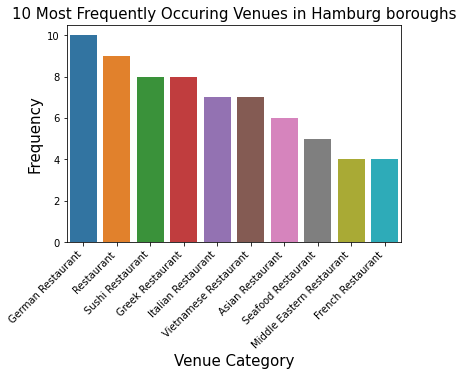

<Figure size 1296x504 with 0 Axes>

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=hamburg_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Hamburg boroughs', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

Size of the dataframe that results.

In [35]:

print ("Shape of the Data-Frame with Venue Category only Restaurant: ", hamburg_Venues_only_restaurant.shape)
hamburg_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (109, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Hamburg-Mitte,53.529384,9.986831,SuChi,53.516104,9.987444,Asian Restaurant
2,Hamburg-Mitte,53.529384,9.986831,Casa Franco,53.545153,9.976203,Portuguese Restaurant
3,Hamburg-Mitte,53.529384,9.986831,NENI Hamburg,53.542489,9.998431,Middle Eastern Restaurant
4,Hamburg-Mitte,53.529384,9.986831,Thai Food,53.547878,9.983028,Thai Restaurant
5,Hamburg-Mitte,53.529384,9.986831,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant
6,Hamburg-Mitte,53.529384,9.986831,Mutterland Cölln's,53.548832,9.994156,German Restaurant
7,Hamburg-Mitte,53.529384,9.986831,Köz Urfam Lezzet,53.517751,9.985792,Mediterranean Restaurant
8,Hamburg-Mitte,53.529384,9.986831,Picasso,53.549934,9.995627,Spanish Restaurant
9,Hamburg-Mitte,53.529384,9.986831,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant
10,Hamburg-Mitte,53.529384,9.986831,Kardelen,53.550667,9.982271,Turkish Restaurant


In [36]:

hamburg_Venues_restaurant = hamburg_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

Analysis of the Boroughs

In [38]:
hamburg_Venues_restaurant


Neighborhood
Altona            4
Bergedorf         8
Eimsbüttel       27
Hamburg-Mitte    22
Hamburg-Nord     21
Harburg           1
Wandsbek         26
Name: Venue Category, dtype: int64

In [39]:
hamburg_Venues_restaurant_df  = hamburg_Venues_restaurant.to_frame().reset_index()
hamburg_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
hamburg_Venues_restaurant_df.index = np.arange(1, len(hamburg_Venues_restaurant_df)+1)
list_rest_no =hamburg_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =hamburg_Venues_restaurant_df['Neighborhood'].to_list()

In [40]:
# one hot encoding
hamburg_onehot = pd.get_dummies(hamburg_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hamburg_onehot['Neighborhood'] = hamburg_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hamburg_onehot.columns[-1]] + list(hamburg_onehot.columns[:-1])
hamburg_onehot = hamburg_onehot[fixed_columns]

hamburg_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant,...,Schnitzel Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Hamburg-Mitte,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hamburg-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hamburg-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hamburg-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,Hamburg-Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
hamburg_onehot.shape

(109, 34)

Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.

In [43]:
hamburg_grouped = hamburg_onehot.groupby('Neighborhood').mean().reset_index()
hamburg_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant,...,Schnitzel Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Swabian Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Altona,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bergedorf,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,...,0.125,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Eimsbüttel,0.0,0.074074,0.074074,0.000000,0.000000,0.000000,0.074074,0.037037,0.000000,...,0.000,0.037037,0.000000,0.074074,0.000000,0.074074,0.000000,0.000000,0.000000,0.074074
3,Hamburg-Mitte,0.0,0.045455,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,...,0.000,0.136364,0.045455,0.090909,0.045455,0.000000,0.045455,0.045455,0.045455,0.136364
4,Hamburg-Nord,0.0,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,...,0.000,0.047619,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619
5,Harburg,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Wandsbek,0.0,0.000000,0.000000,0.038462,0.076923,0.000000,0.000000,0.038462,0.038462,...,0.000,0.000000,0.000000,0.038462,0.000000,0.038462,0.076923,0.038462,0.000000,0.038462


Print the neighbourhoods with their respective top 10 most common venues

In [46]:
num_top_venues = 10

for hood in hamburg_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hamburg_grouped[hamburg_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altona----
                       venue  freq
0          German Restaurant  0.50
1           Asian Restaurant  0.25
2          Indian Restaurant  0.25
3        American Restaurant  0.00
4  Middle Eastern Restaurant  0.00
5        Peruvian Restaurant  0.00
6      Portuguese Restaurant  0.00
7                 Restaurant  0.00
8       Schnitzel Restaurant  0.00
9         Seafood Restaurant  0.00


----Bergedorf----
                   venue  freq
0       Sushi Restaurant  0.12
1       Asian Restaurant  0.12
2             Restaurant  0.12
3   Schnitzel Restaurant  0.12
4     Italian Restaurant  0.12
5     Falafel Restaurant  0.12
6   Fast Food Restaurant  0.12
7      German Restaurant  0.12
8     Spanish Restaurant  0.00
9  Portuguese Restaurant  0.00


----Eimsbüttel----
                   venue  freq
0      French Restaurant  0.15
1             Restaurant  0.11
2  Vietnamese Restaurant  0.07
3    Austrian Restaurant  0.07
4       Doner Restaurant  0.07
5       Asian Restaurant  0.07
6

Creating a pandas dataframe

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted1 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted1['Neighborhood'] = hamburg_grouped['Neighborhood']

for ind in np.arange(hamburg_grouped.shape[0]):
    neighborhoods_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(hamburg_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted1.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
1,Bergedorf,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Eimsbüttel,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,Hamburg-Mitte,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
4,Hamburg-Nord,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant
5,Harburg,American Restaurant,Korean Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant
6,Wandsbek,Greek Restaurant,Italian Restaurant,Chinese Restaurant,German Restaurant,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Sushi Restaurant,Bavarian Restaurant,Indian Restaurant


<h4>Step 4: Building the clusters <h4>


In [72]:
# set number of clusters (I choose 6)
kclusters = 6

hamburg_grouped_clustering = hamburg_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hamburg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 0, 4, 0, 1, 5], dtype=int32)

In [73]:
hamburg_merged = df
hamburg_merged.head(10)

,Neighborhood,Population,Area (km²),Density,Latitude,Longitude
0,Hamburg-Mitte,"233,114[5]",107.1 km²,2177,53.529384,9.986831
1,Altona,"243,972[5]",78.3 km²,3149,53.586468,9.777670
2,Eimsbüttel,"246,087[5]",50.1 km²,4915,53.572937,9.958261
3,Hamburg-Nord,"279,498[5]",57.8 km²,4838,53.619156,10.009740
4,Wandsbek,"409,771[5]",147.5 km²,2777,53.576003,10.075535
5,Bergedorf,"118,942[5]",154.8 km²,769,53.483838,10.210047
6,Harburg,"201,119[5]","125,4 km²",1253,53.317224,9.908494


In [94]:

neighborhoods_venues_sorted1.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
1,Bergedorf,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Eimsbüttel,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,Hamburg-Mitte,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
4,Hamburg-Nord,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant
5,Harburg,American Restaurant,Korean Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant
6,Wandsbek,Greek Restaurant,Italian Restaurant,Chinese Restaurant,German Restaurant,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Sushi Restaurant,Bavarian Restaurant,Indian Restaurant


In [95]:
neighborhoods_venues_sorted1_w_clusters = neighborhoods_venues_sorted1


In [96]:
neighborhoods_venues_sorted1_w_clusters.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
1,Bergedorf,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Eimsbüttel,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,Hamburg-Mitte,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
4,Hamburg-Nord,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant


In [97]:
# add clustering labels

neighborhoods_venues_sorted1_w_clusters.insert(0, 'Cluster1 Labels', kmeans.labels_)

In [98]:
neighborhoods_venues_sorted1_w_clusters.head(10)

,Cluster1 Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Altona,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
1,3,Bergedorf,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant
2,0,Eimsbüttel,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,4,Hamburg-Mitte,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
4,0,Hamburg-Nord,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant
5,1,Harburg,American Restaurant,Korean Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant
6,5,Wandsbek,Greek Restaurant,Italian Restaurant,Chinese Restaurant,German Restaurant,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Sushi Restaurant,Bavarian Restaurant,Indian Restaurant


In [100]:
hamburg_merged.rename(columns={'Borough':'Neighborhood'}, inplace=True)

hamburg_merged = hamburg_merged.join(neighborhoods_venues_sorted1.set_index('Neighborhood'), on='Neighborhood')

hamburg_merged.head(8)

,Neighborhood,Population,Area (km²),Density,Latitude,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hamburg-Mitte,"233,114[5]",107.1 km²,2177,53.529384,9.986831,4,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
1,Altona,"243,972[5]",78.3 km²,3149,53.586468,9.777670,2,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
2,Eimsbüttel,"246,087[5]",50.1 km²,4915,53.572937,9.958261,0,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,Hamburg-Nord,"279,498[5]",57.8 km²,4838,53.619156,10.009740,0,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant
4,Wandsbek,"409,771[5]",147.5 km²,2777,53.576003,10.075535,5,Greek Restaurant,Italian Restaurant,Chinese Restaurant,German Restaurant,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Sushi Restaurant,Bavarian Restaurant,Indian Restaurant
5,Bergedorf,"118,942[5]",154.8 km²,769,53.483838,10.210047,3,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant
6,Harburg,"201,119[5]","125,4 km²",1253,53.317224,9.908494,1,American Restaurant,Korean Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant


Finally, let's visualize the resulting clusters.

In [102]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(hamburg_merged['Latitude'], 
                                  hamburg_merged['Longitude'], 
                                  hamburg_merged['Neighborhood'], 
                                  hamburg_merged['Cluster1 Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

Conclusion

In [103]:
# Lets examine the clusters

hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 0, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]


,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"246,087[5]",9.958261,0,French Restaurant,Restaurant,Sushi Restaurant,Doner Restaurant,Vietnamese Restaurant,Tapas Restaurant,Austrian Restaurant,Asian Restaurant,Seafood Restaurant,Indian Restaurant
3,"279,498[5]",10.009740,0,German Restaurant,Restaurant,Greek Restaurant,Sushi Restaurant,Vietnamese Restaurant,Moroccan Restaurant,Asian Restaurant,Doner Restaurant,Italian Restaurant,Korean Restaurant


In [104]:
#These clusters are Geographically co-located and have teh largest population. 
# Befitting  cosmopolitan city like Hamburg, the food options are multi cuisine but predominantly central European with a smattering 
# of Asian food. Lets keep looking

In [105]:
hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 1, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]


,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"201,119[5]",9.908494,1,American Restaurant,Korean Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant


In [106]:
# A little isolated and off to the North. We find a more mixed cuisine with Asian and American food predominating

In [107]:
hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 2, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]

,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"243,972[5]",9.77767,2,German Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Korean Restaurant,Austrian Restaurant,Bavarian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant


In [108]:
# This cluster is a mixture of German and Asian cuisine

In [110]:
hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 3, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]

,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"118,942[5]",10.210047,3,Schnitzel Restaurant,Sushi Restaurant,German Restaurant,Fast Food Restaurant,Falafel Restaurant,Restaurant,Italian Restaurant,Asian Restaurant,Comfort Food Restaurant,Doner Restaurant


In [114]:
# This cluster is a mostly German ( & Schnitzel!) cuisine

In [112]:
hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 4, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]

,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"233,114[5]",9.986831,4,Vietnamese Restaurant,Seafood Restaurant,Sushi Restaurant,Comfort Food Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant


In [ ]:
# This is clearly the Asian quarter! 

In [113]:
hamburg_merged.loc[hamburg_merged['Cluster1 Labels'] == 5, hamburg_merged.columns[[1] + list(range(5, hamburg_merged.shape[1]))]]

,Population,Longitude,Cluster1 Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"409,771[5]",10.075535,5,Greek Restaurant,Italian Restaurant,Chinese Restaurant,German Restaurant,Middle Eastern Restaurant,Restaurant,Thai Restaurant,Sushi Restaurant,Bavarian Restaurant,Indian Restaurant


In [ ]:
# Bingo! This is the place to go if you are hungering for mediterranean food. 